# Predict A Function's Output Using NN

### Do Imports

In [1]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

## Make Inputs

In [2]:
X_input = np.random.rand(150, 1) * 10

X_input.shape, np.min(X_input), np.max(X_input)

((150, 1), 0.0061034694563633085, 9.98920784546378)

## Configure The Network

In [3]:
tf.reset_default_graph()

In [24]:
num_input, layer_1_size, layer_2_size, num_output = 1, 10, 5, 1
learning_rate = 0.01
n_epoch = 10000

## Build The Network

### Input Layer

In [5]:
with tf.variable_scope("input"):
    X = tf.placeholder(tf.float32, [None, num_input], "X")

### Hidden Layer 1

In [6]:
with tf.variable_scope("layer1"):
    W = tf.get_variable("W1", [num_input, layer_1_size], tf.float32)
    b = tf.get_variable("b1", [layer_1_size], tf.float32)
    Z = tf.add(tf.matmul(X, W), b)
    A1 = tf.nn.relu(Z)

### Hidden Layer 2

In [7]:
with tf.variable_scope("layer2"):
    W = tf.get_variable("W2", [layer_1_size, layer_2_size], tf.float32)
    b = tf.get_variable("b2", [layer_2_size], tf.float32)
    Z = tf.add(tf.matmul(A1, W), b)
    A2 = tf.nn.relu(Z)

### Output Layer

In [8]:
with tf.variable_scope("output"):
    W = tf.get_variable("W3", [layer_2_size, num_output], tf.float32)
    b = tf.get_variable("b3", [num_output], tf.float32)
    Z = tf.add(tf.matmul(A2, W), b)
    Y_hat = Z

### Loss

In [9]:
with tf.variable_scope("loss"):
    Y = tf.placeholder(tf.float32, [None, num_output])
    cost = tf.reduce_mean(
        tf.keras.losses.logcosh(y_true=Y, y_pred=Y_hat)
    )

### Optimizer

In [10]:
with tf.variable_scope("optimize"):
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

## Running Session

### Generate Dataset

In [11]:
from sympy.parsing.sympy_parser import parse_expr
import sympy

In [44]:
x_sym = sympy.symbols("x")
func_str = "log(x)"
func = sympy.sympify(func_str)
func

log(x)

In [20]:
def make_output(features) -> np.ndarray:
    features = np.squeeze(features).tolist()
    labels = []
    for x in features:
        labels.append(func.evalf(subs={x_sym: sympy.sympify(x)}))
    return np.array(labels).reshape((-1, 1))


((150, 1), -5.09889790614919, 2.30150529476810)

In [45]:
Y_input = make_output(X_input)

Y_input.shape, np.min(Y_input), np.max(Y_input)

((150, 1), -5.09889790614919, 2.30150529476810)

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X_input, Y_input, test_size=1/3)

In [47]:
train_dict = {X: X_train, Y: Y_train}
test_dict = {X: X_test, Y: Y_test}

In [48]:
session = tf.Session()
session.run(tf.global_variables_initializer())
for _ in range(n_epoch):
    session.run(optimizer, feed_dict=train_dict)

## Cost

In [49]:
cost = session.run(cost, feed_dict=test_dict)
cost

TypeError: Fetch argument 0.1844633 has invalid type <class 'numpy.float32'>, must be a string or Tensor. (Can not convert a float32 into a Tensor or Operation.)

In [30]:
import matplotlib.pyplot as plot
%matplotlib inline

In [50]:
train_sorted_index = np.argsort(np.squeeze(X_train))
test_sorted_index = np.argsort(np.squeeze(X_test))

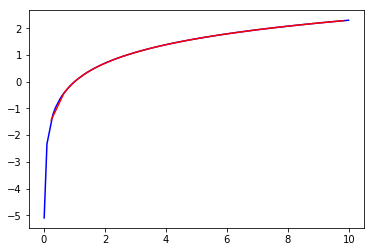

In [51]:
plot.plot(
    np.squeeze(X_train)[train_sorted_index], 
    np.squeeze(Y_train)[train_sorted_index],
    'b-'
)
plot.plot(
    np.squeeze(X_test)[test_sorted_index], 
    np.squeeze(Y_test)[test_sorted_index],
    'r-'
)
plot.show()

## The End!